In [1]:
from funcs import simulate, analytical_efficiency, find_max_efficiency, find_max_analytical_efficiency  
import numpy as np 
import matplotlib.pyplot as plt 
import xlsxwriter as xl 

**Task A**: The `simulate` function is in the `funcs.py` file. 
As an example, run this function for d=10, n=100000, p=0.5 

In [2]:
d = 10 
n = 1000000
p = 0.05
num_tests, efficiency = simulate(d, n, p) 
print(f'Number of tests: {num_tests} Efficiency: {efficiency}')

Number of tests: 5013580 Efficiency: 1.9945827133505398


**Task B**: The `find_max_efficiency` function allows finding the `d` at which the maximal efficiency is achieved. 
Below the optimal `d` is calculated for `p=0.08` by exploring the `d` range from 2 to 10 

In [3]:
d_max = 10 
n = 1000000 
p = 0.08  
max_efficiency = find_max_efficiency(d_max, n, p)
print(f'For {p=}, the maximum efficiency is achieved at d={max_efficiency[0]}, the efficiency={max_efficiency[1]}')

For p=0.08, the maximum efficiency is achieved at d=4, the efficiency=1.8743931652127623


**Task C**: To find the analytical formula, we start from calculating the probability that all tests in a group are negative, which is equal to $(1 - p)^d$. Correspondingly, the probability that a group contains at least one positively tested sample is equal to $1 - (1 - p)^d$. So, the number of groups with at least one positive test is equal to $(1 - (1 - p)^d) * n$. And the total number of tests to conduct is equal to $n + d * (1 - (1 - p)^d) * n$ which is equivalent to $(1 + d * (1 - (1 - p)^d)) *n$. The total number of samples is equal to $n * d$. The efficiency is equal to $ \frac{d} {(1 + d * (1 - (1 - p)^d))}$ 
The corresponding function, `analytical_efficiency`, is implemented 

Below is a plot showing a comparison of simulated and analytical efficiencies 

In [4]:
d_max = 20 
n = 1000000 
p_range = [0.05, 0.08]
simulated_efficiencies = [simulate(d, n, p)[1] for p in p_range for d in range(2, d_max + 1)] 
analytical_efficiencies = [analytical_efficiency(d, p) for p in p_range for d in range(2, d_max + 1)] 


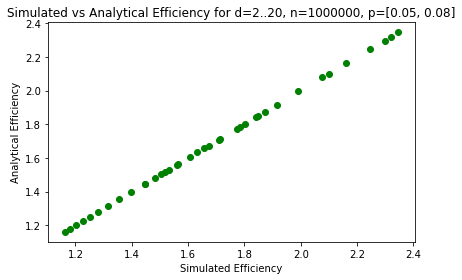

In [5]:
fig, ax = plt.subplots() 
ax.set_title(f'Simulated vs Analytical Efficiency for d=2..{d_max}, {n=}, p={p_range}')
ax.set_xlabel('Simulated Efficiency') 
ax.set_ylabel('Analytical Efficiency') 
ax.scatter(simulated_efficiencies, analytical_efficiencies, color='green')
fig.tight_layout()

**Task D**: Efficiency plot for `d=3,5,7` and `p=0.01..0.15` 
From the plot, it is clear that for `p=0.01..0.03` the `d=7` works better, higher `p` values require smaller groups: `d=5` for `p=0.04..0.09`, and `d=3` for `p=0.1..` 

In [6]:
d_range = [3, 5, 7] 
p_range = np.linspace(0.01, 0.15, 15) 
analytical_efficiencies = [[analytical_efficiency(d, p) for p in p_range] for d in d_range] 

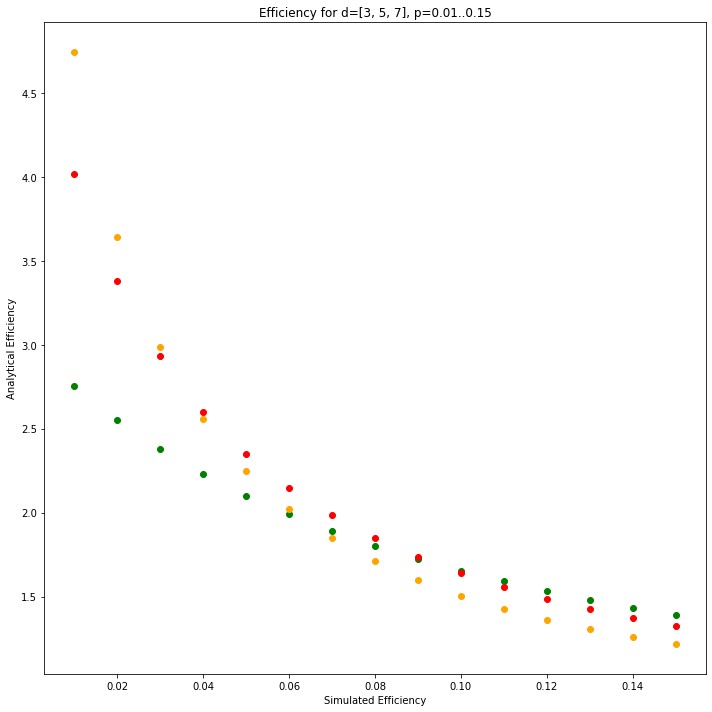

In [7]:
fig, ax = plt.subplots(figsize=(10,10)) 
ax.set_title(f'Efficiency for d={d_range}, p={min(p_range)}..{max(p_range)}') 
ax.set_xlabel('Simulated Efficiency') 
ax.set_ylabel('Analytical Efficiency') 
ax.scatter(p_range, analytical_efficiencies[0], color='green')
ax.scatter(p_range, analytical_efficiencies[1], color='red')
ax.scatter(p_range, analytical_efficiencies[2], color='orange') 
fig.tight_layout()

**Task E**: The `xlsx` file with optimal `d` and `efficiency` values is written for `p=0.005..0.25` 

In [8]:
p_range = np.linspace(0.005, 0.25, 50) 
d_max = 20 
efficiencies = [(p, *find_max_analytical_efficiency(d_max, p)) for p in p_range] 

In [9]:
workbook = xl.Workbook('efficiencies.xlsx') 
worksheet = workbook.add_worksheet() 
for i, row in enumerate(efficiencies): 
    worksheet.write_row(i, 0, row) 
workbook.close()